#Import required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from google.colab.patches import cv2_imshow



In [2]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load the dataset

In [4]:
import numpy as np
import pandas as pd

# Load the numpy array from images.npy
images = np.load('/content/drive/My Drive/Plant_Seedling_Classification/images.npy')

# Load the labels from the Excel sheet
labels = pd.read_csv('/content/drive/My Drive/Plant_Seedling_Classification/Labels.csv')

# # Print the shapes of the loaded data
# print("images shape:", images.shape)
# print("Labels shape:", labels.shape)

In [5]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [6]:
np.unique(labels) #labels

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

##### There are 12 unique classes

In [7]:
# Print the shapes of the loaded data
print("images shape:", images.shape)
print("Labels shape:", labels.shape)

images shape: (4750, 128, 128, 3)
Labels shape: (4750, 1)


There are 4750 RGB images of shape 128 X 128 X 3, each image having 3 channels

#Plotting images using OpenCV and Matplotlib

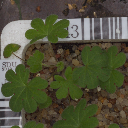

In [8]:
#Use OpenCV to show an image
cv2_imshow(images[3])

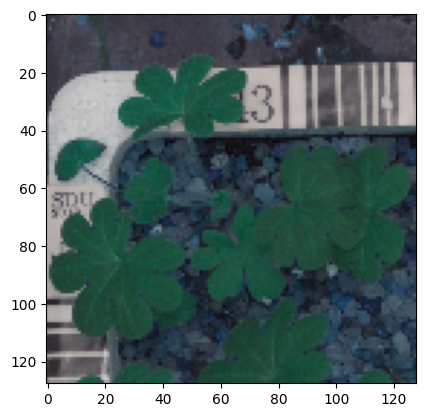

In [9]:
#Use Matplotlib to show the same Image
plt.imshow(images[3])

From here we can see that the image-colours are different because opencv read on BGR while Matplotlib reads in RGB

In [23]:
from google.colab.patches import cv2_imshow
import cv2
#converting the images from BGR using cvtcolor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

#Exploratory Data Analysis

In [11]:
#How many unique plant species are in my dataset

labels['Label'].nunique()

12

In [12]:
labels['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

there is a variation in the number of unique values which can result to a problem of imbalanced data

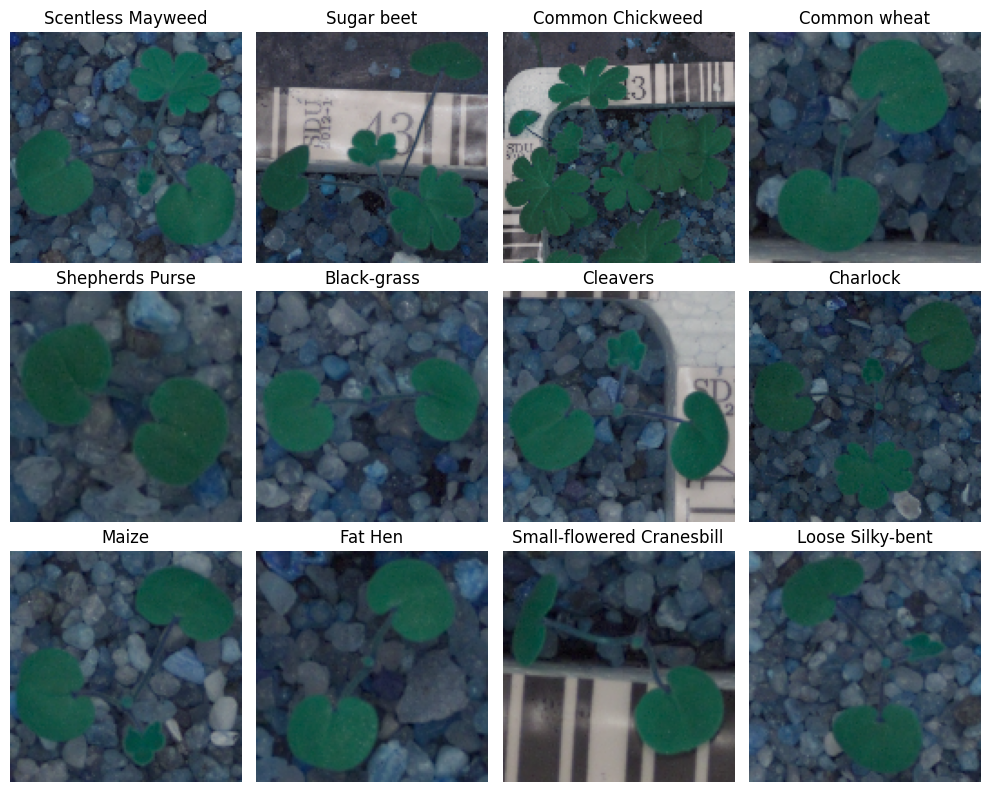

In [13]:
import random

def plot_images(images, labels):
    num_classes = 12
    categories = np.unique(labels)
    keys = np.unique(labels)
    rows = 3
    cols = 4
    fig = plt.figure(figsize=(10, 8))

    # Generate a random subset of unique indices without repetition
    random_indices = random.sample(range(len(keys)), rows * cols)

    for i, random_index in enumerate(random_indices):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.imshow(images[random_index, :])
        ax.set_title(keys[random_index])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_images(images, labels)


In [14]:
#Set the parent folder path to  images
folder_path = '/content/drive/MyDrive/Plant_Seedling_Classification'

#set the path to the train_test split
train_dir = '/content/drive/MyDrive/Plant_Seedling_Classification/train_dir'
val_dir = '/content/drive/MyDrive/Plant_Seedling_Classification/val_dir'
test_dir = '/content/drive/MyDrive/Plant_Seedling_Classification/test_dir'

#set the image size
img_size = (32, 32)

#train_test split ratio
train_ratio = 0.7
val_ratio = 1.5
test_ratio = 1.5


In [15]:
##checking for data imbalance

import seaborn as sns

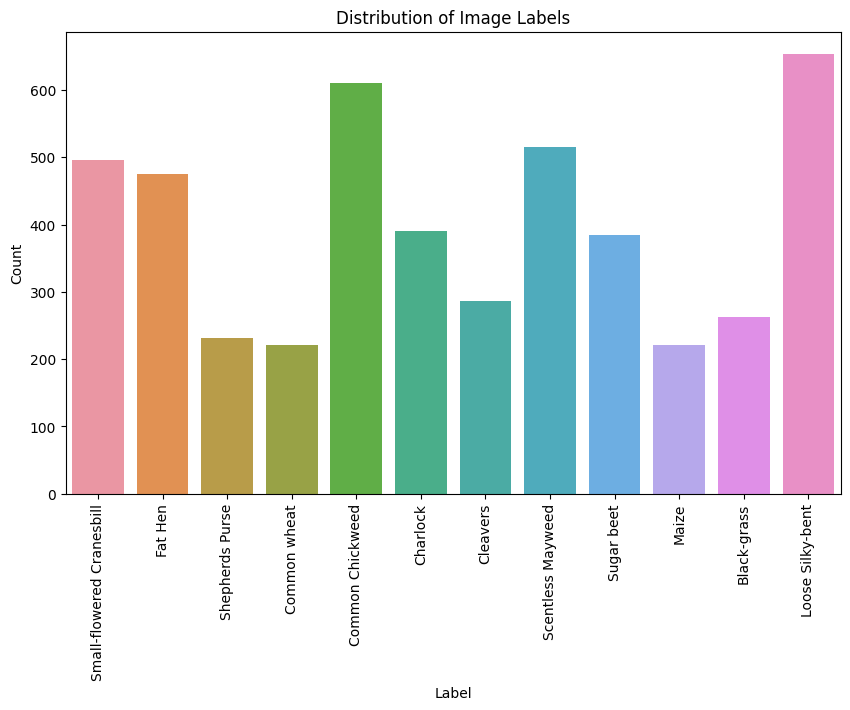

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' is your list of image labels

# Convert labels list to DataFrame with an index
df_labels = pd.DataFrame({'Label': np.ravel(labels)}, index=range(len(labels)))

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_labels, x='Label')
plt.xticks(rotation = 90)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Image Labels')
plt.show()


fromthe image, we can see that the data is not balanced

#Resize the images

In [24]:
import cv2
images_decreased = []
height = 32
width = 32
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append(cv2.resize(images[i], dimensions, interpolation = cv2.INTER_LINEAR))

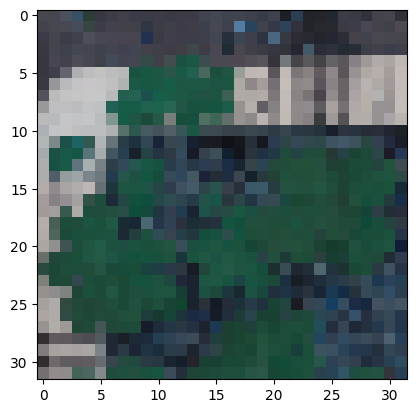

In [26]:
#sanity check for image resized
plt.imshow(images_decreased[3]);

Visualizing using Gaussian Blur

In [27]:
# Applying Gaussian Blur to denoise the images
images_gb = []
for i in range(len(images)):
  images_gb.append(cv2.GaussianBlur(images[i], ksize = (3,3), sigmaX = 0))

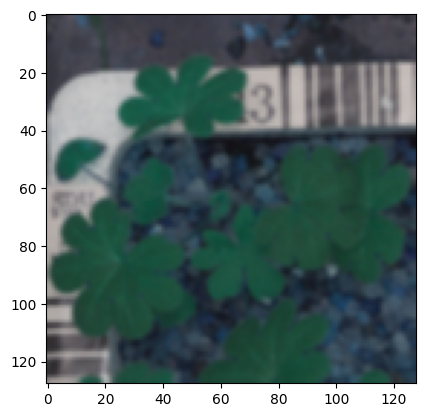

In [28]:
plt.imshow(images_gb[3])

#Splitting the Dataset

In [29]:
#Split the image files into train, validation and testsets
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size = 0.1, random_state = 42, stratify = labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.1, random_state = 42, stratify = y_temp)


In [30]:
import numpy as np

# Convert lists to NumPy arrays
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_val_np = np.array(X_val)
y_val_np = np.array(y_val)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# Print the shapes
print(X_train_np.shape, y_train_np.shape)
print(X_val_np.shape, y_val_np.shape)
print(X_test_np.shape, y_test_np.shape)


(3847, 32, 32, 3) (3847, 1)
(428, 32, 32, 3) (428, 1)
(475, 32, 32, 3) (475, 1)


In [31]:

# Reshape label arrays to have shape (n, 1)
y_train_reshaped = np.reshape(y_train, (-1, 1))
y_val_reshaped = np.reshape(y_val, (-1, 1))
y_test_reshaped = np.reshape(y_test, (-1, 1))

# Print the new shapes
print(y_train_reshaped.shape)
print(y_val_reshaped.shape)
print(y_test_reshaped.shape)

(3847, 1)
(428, 1)
(475, 1)


In [32]:
import os
import shutil
from PIL import Image
from sklearn.model_selection import train_test_split

# Set the path to the parent directory
parent_dir = '/content/drive/MyDrive/Plant_Seedling_Classification'  # Replace with the actual parent directory path

# Set the paths to the train, validation, and test directories
train_dir = os.path.join(parent_dir, 'train')
val_dir = os.path.join(parent_dir, 'val')
test_dir = os.path.join(parent_dir, 'test')

# Set the ratio for test and validation sets
test_ratio = 0.2
val_ratio = 0.1

# Get a list of all the image folders
all_folders = os.listdir(parent_dir)

# Loop through each folder
for folder in all_folders:
    folder_path = os.path.join(parent_dir, folder)

    # Skip non-directory items
    if not os.path.isdir(folder_path):
        continue

    # Get a list of all the image files in the folder
    all_files = os.listdir(folder_path)
    img_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

    # Skip if there are no image files
    if len(img_files) == 0:
        continue

    # Split the image files into train, validation, and test sets
    if len(img_files) < 2:
        train_files = img_files
        val_files = []
        test_files = []
    else:
        train_files, test_files = train_test_split(img_files, test_size=test_ratio, random_state=42)
        train_files, val_files = train_test_split(train_files, test_size=val_ratio / (1.0 - test_ratio), random_state=42)

    # Create the train, validation, and test directories for the current folder
    train_folder_path = os.path.join(train_dir, folder)
    os.makedirs(train_folder_path, exist_ok=True)

    val_folder_path = os.path.join(val_dir, folder)
    os.makedirs(val_folder_path, exist_ok=True)

    test_folder_path = os.path.join(test_dir, folder)
    os.makedirs(test_folder_path, exist_ok=True)

    # Resize and move the images to their respective directories
    for file in train_files:
        src_path = os.path.join(folder_path, file)
        dst_path = os.path.join(train_folder_path, file)
        img = Image.open(src_path)
        img = img.resize((224, 224))  # Replace with the desired image size
        img.save(dst_path)

    for file in val_files:
        src_path = os.path.join(folder_path, file)
        dst_path = os.path.join(val_folder_path, file)
        img = Image.open(src_path)
        img = img.resize((224, 224))  # Replace with the desired image size
        img.save(dst_path)

    for file in test_files:
        src_path = os.path.join(folder_path, file)
        dst_path = os.path.join(test_folder_path, file)
        img = Image.open(src_path)
        img = img.resize((224, 224))  # Replace with the desired image size
        img.save(dst_path)


## Encoding the target labels

In [33]:
#convert labels from names to one hot vector using Label Binarizers
from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## Data Normalization

In [34]:
from re import X
#Normalizing the image pixels
X_train_normalized = X_train.astype('float')/255.0
X_val_normalized = X_val.astype('float')/255.0
X_test_normalized = X_test.astype('float')/255.0

## Model Building - Convoluted Neural Network(CNN)

In [35]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [36]:
#set seed for reproducibility
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## CNN model
1. Feature Extraction Layers comprisedof convolution and pooling layers
2. the Fully Connected Layer for prediction

In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Initializing a sequential model
import tensorflow as tf
from tensorflow.keras import layers

# Define the CNN architecture
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3),  input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
#model.add(BatchNormalization())

#Second convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#model.add(BatchNormalization())

#flatten to convertto1 dimension ready for the dense layers
model.add(Flatten())

#Add a fully connected dense layer with 100 neurons
model.add(Dense(100, activation = 'relu'))
#model.add(Dropout(0.2))

#Adding the output layer with 10 nuerons nd activaton functon softmax
model.add(Dense(12, activation = 'softmax'))

#using Adam optimiser
opt = Adam()

#Compile model
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Generating the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 100)               2

In [38]:
model_filename = '/content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5'
#es = Earlystopping(monitor = 'val_loss', patience = 3, mode = 'min', verbose = 2)
chkpt = ModelCheckpoint(model_filename, verbose = 1, save_best_only =True)

## Fitting the model on the train data

In [39]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs = 50,
            validation_data = (X_val_normalized, y_val_encoded),
            batch_size = 32,
            verbose = 2,
            callbacks = [chkpt]
)


Epoch 1/50

Epoch 1: val_loss improved from inf to 1.88119, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5
121/121 - 13s - loss: 2.1500 - accuracy: 0.2547 - val_loss: 1.8812 - val_accuracy: 0.3364 - 13s/epoch - 104ms/step
Epoch 2/50

Epoch 2: val_loss improved from 1.88119 to 1.60703, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5
121/121 - 1s - loss: 1.6563 - accuracy: 0.3941 - val_loss: 1.6070 - val_accuracy: 0.4206 - 518ms/epoch - 4ms/step
Epoch 3/50

Epoch 3: val_loss improved from 1.60703 to 1.40309, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5
121/121 - 1s - loss: 1.4524 - accuracy: 0.4856 - val_loss: 1.4031 - val_accuracy: 0.5234 - 525ms/epoch - 4ms/step
Epoch 4/50

Epoch 4: val_loss improved from 1.40309 to 1.32428, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5
121/121 - 1s - loss: 1.3085 - accuracy: 0.5347 - val_loss

## Model Evaluation

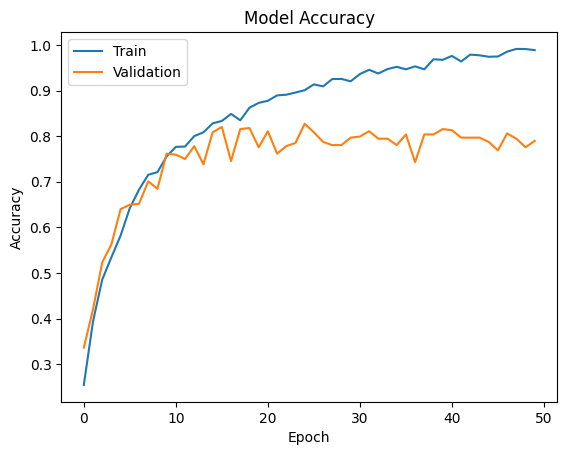

In [40]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The training accuracy was good even though it was fluctuating but the validation accuracy is poor so it is overfitting, this could be as a result of the imbalanced data

## Hyperparameter Tuning

Appliied Batch Normalization, Dropout and adjusted the filters in the first and second bloc

In [41]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Initializing a sequential model
import tensorflow as tf
from tensorflow.keras import layers

# Define the CNN architecture
model2 = Sequential()

# Add convolutional layers
model2.add(Conv2D(64, (3, 3),  input_shape=(32, 32, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(BatchNormalization())

#Second convolution
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())

#flatten to convertto1 dimension ready for the dense layers
model2.add(Flatten())

#Add a fully connected dense layer with 100 neurons
model2.add(Dense(100, activation = 'relu'))
model2.add(Dropout(0.2))

#Adding the output layer with 10 nuerons nd activaton functon softmax
model2.add(Dense(12, activation = 'softmax'))

#using Adam optimiser
opt = Adam()

#Compile model
model2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Generating the summary of the model
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [42]:
model2_filename = '/content/drive/MyDrive/Plant_Seedling_Classification/Models/plant_improved.hdf5'
es = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'min', verbose = 2)
chkpt2 = ModelCheckpoint(model2_filename, verbose = 1, save_best_only =True)

In [43]:
history = model2.fit(
            X_train_normalized, y_train_encoded,
            epochs = 50,
            validation_data = (X_val_normalized, y_val_encoded),
            batch_size = 32,
            verbose = 2,
            callbacks = [es,chkpt2]
)

Epoch 1/50

Epoch 1: val_loss improved from inf to 3.82393, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant_improved.hdf5
121/121 - 4s - loss: 1.8037 - accuracy: 0.4377 - val_loss: 3.8239 - val_accuracy: 0.0561 - 4s/epoch - 37ms/step
Epoch 2/50

Epoch 2: val_loss did not improve from 3.82393
121/121 - 1s - loss: 0.9236 - accuracy: 0.6813 - val_loss: 4.7443 - val_accuracy: 0.1636 - 524ms/epoch - 4ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 3.82393
121/121 - 1s - loss: 0.5936 - accuracy: 0.7962 - val_loss: 5.5162 - val_accuracy: 0.1659 - 532ms/epoch - 4ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 3.82393
121/121 - 0s - loss: 0.4232 - accuracy: 0.8547 - val_loss: 5.2220 - val_accuracy: 0.1449 - 494ms/epoch - 4ms/step
Epoch 4: early stopping


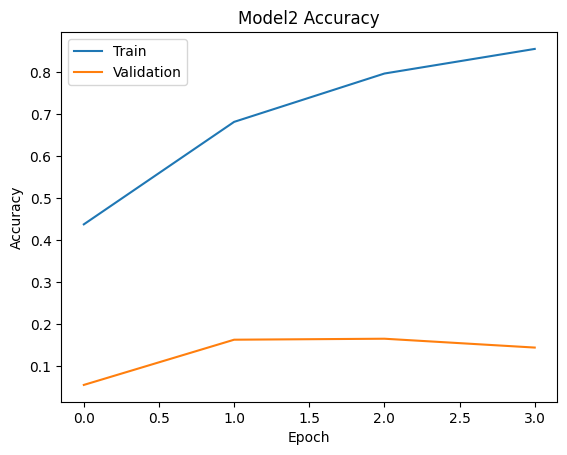

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model2 Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

here, the accuracy is increasing showing that the model is learning well but the validation is not improving

In [45]:
#Here we would get the output as probabilities for each category
y_pred = model2.predict(X_test_normalized)

15/15 [==============================] - 0s 6ms/step


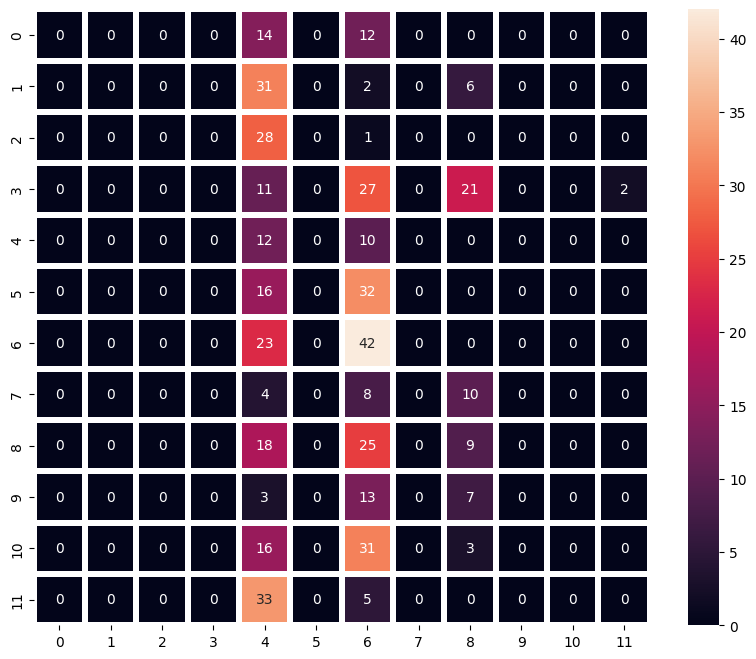

In [46]:
#Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis = 1)
y_test_arg = np.argmax(y_test_encoded, axis = 1)

#Plotting the Confusion Matrix usin confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidth = 4,
    fmt = 'd',
    square = True,
    ax=ax
)
plt.show()

##### the model is not predicting well

#Model 3

### #Data Augumentation

In [47]:
from tensorflow.keras import backend
backend.clear_session()

#fixing the seed for randon number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [48]:
from keras.preprocessing.image import ImageDataGenerator

#All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                                rotation_range = 180,
                                fill_mode = 'nearest',
                                horizontal_flip = True,
                                vertical_flip = True,
                                shear_range = 0.2,
                                zoom_range = 0.2,

                                )

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD

# Initializing a sequential model
model3 = Sequential()

# Add convolutional layers
model3.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(2, 2))
model3.add(BatchNormalization())

model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(BatchNormalization())

model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(BatchNormalization())

# Flatten to convert to 1 dimension ready for the dense layers
model3.add(Flatten())

# Add a fully connected dense layer with 100 neurons and dropout regularization
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.2))

# Adding the output layer with 12 neurons and softmax activation
model3.add(Dense(12, activation='softmax'))

# Using Stochastic Gradient Descent (SGD) optimizer
opt = SGD()

# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                        

In [50]:
model3_filename = '/content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5'
es = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'min', verbose = 2)
chkpt3 = ModelCheckpoint(model3_filename, verbose = 1, save_best_only =True)

In [51]:
#Epochs
epochs = 50
#Batch_size
batch_size = 32

In [52]:
history2 = model3.fit(
            train_datagen.flow (X_train_normalized, y_train_encoded,
                                batch_size = batch_size,
                                seed = 42,
                                shuffle = False,),
            epochs = epochs,
            steps_per_epoch = X_train_normalized.shape[0]//batch_size,
            validation_data = (X_val_normalized, y_val_encoded),
            batch_size = batch_size,
            verbose = 2,
            callbacks = [es,chkpt3]
)

Epoch 1/50

Epoch 1: val_loss improved from inf to 2.79639, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5
120/120 - 5s - loss: 2.0553 - accuracy: 0.3096 - val_loss: 2.7964 - val_accuracy: 0.0584 - 5s/epoch - 42ms/step
Epoch 2/50

Epoch 2: val_loss did not improve from 2.79639
120/120 - 2s - loss: 1.5202 - accuracy: 0.4682 - val_loss: 2.9588 - val_accuracy: 0.0514 - 2s/epoch - 20ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 2.79639
120/120 - 2s - loss: 1.3163 - accuracy: 0.5397 - val_loss: 2.8941 - val_accuracy: 0.1098 - 2s/epoch - 17ms/step
Epoch 4/50

Epoch 4: val_loss improved from 2.79639 to 2.76456, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5
120/120 - 2s - loss: 1.1467 - accuracy: 0.6087 - val_loss: 2.7646 - val_accuracy: 0.2383 - 2s/epoch - 19ms/step
Epoch 5/50

Epoch 5: val_loss improved from 2.76456 to 2.08579, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Mod

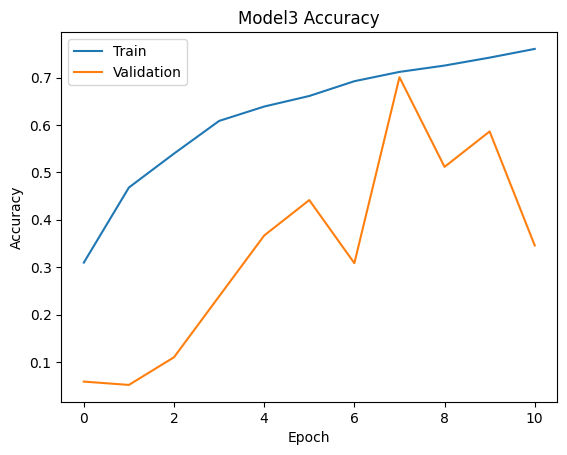

In [53]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model3 Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### the model is overfitting

In [54]:
#Here we would get the output as probabilities for each category
y_pred3 = model3.predict(X_test_normalized)

15/15 [==============================] - 0s 11ms/step


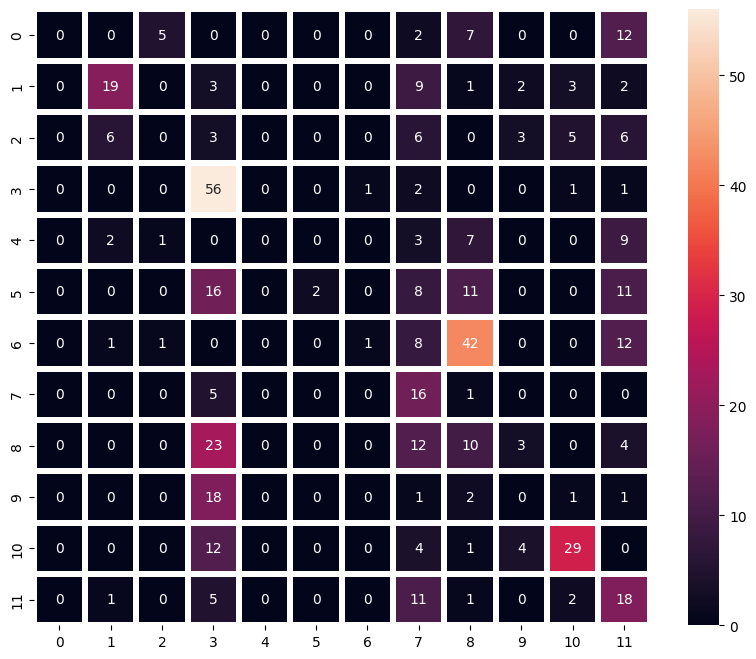

In [55]:
#Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg3 = np.argmax(y_pred3, axis = 1)
y_test_arg3 = np.argmax(y_test_encoded, axis = 1)

#Plotting the Confusion Matrix usin confusion matrix() function which is also predefined tensorflow module
confusion_matrix3 = tf.math.confusion_matrix(y_test_arg3, y_pred_arg3)
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(
    confusion_matrix3,
    annot = True,
    linewidth = 4,
    fmt = 'd',
    square = True,
    ax=ax
)
plt.show()

#Model 4

Tranfer Learning

In [56]:
from tensorflow.keras.models import  Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [57]:
#Freezing all the layers of VGG16
for layer in vgg_model.layers:
  layer.trainable = False

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD

# Initializing a sequential model
new_model = Sequential()

#adding the convolutional part of thee vgg16 model
new_model.add(vgg_model)

#Flattening the output of the VGG16 model
new_model.add(Flatten())

#Add a dense layer output
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(12, activation='softmax'))

opt = Adam()

# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 12)                396       
                                                                 
Total params: 14,749,996
Trainable params: 35,308
Non-

In [59]:
new_model_filename = '/content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5'
es = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'min', verbose = 2)
chkpt_new_model = ModelCheckpoint(new_model_filename, verbose = 1, save_best_only =True)

In [60]:
history_vgg16 = new_model.fit(
            train_datagen.flow(X_train_normalized, y_train_encoded,
                                batch_size = batch_size,
                                seed = 42,
                                shuffle = False),
            epochs = 10,
            steps_per_epoch = X_train_normalized.shape[0]//batch_size,
            validation_data = (X_val_normalized, y_val_encoded),
            batch_size = batch_size,
            verbose = 2,
            callbacks = [es,chkpt_new_model]
)

Epoch 1/10

Epoch 1: val_loss improved from inf to 2.03090, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5
120/120 - 6s - loss: 2.2877 - accuracy: 0.2031 - val_loss: 2.0309 - val_accuracy: 0.3037 - 6s/epoch - 53ms/step
Epoch 2/10

Epoch 2: val_loss improved from 2.03090 to 1.81678, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5
120/120 - 3s - loss: 1.9431 - accuracy: 0.3038 - val_loss: 1.8168 - val_accuracy: 0.3364 - 3s/epoch - 29ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.81678 to 1.77611, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5
120/120 - 2s - loss: 1.8048 - accuracy: 0.3431 - val_loss: 1.7761 - val_accuracy: 0.3621 - 2s/epoch - 21ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.77611 to 1.71369, saving model to /content/drive/MyDrive/Plant_Seedling_Classification/Models/plant.hdf5
120/120 - 2s - loss: 1.7223 - accuracy: 0.3898 - val_loss: 1.713

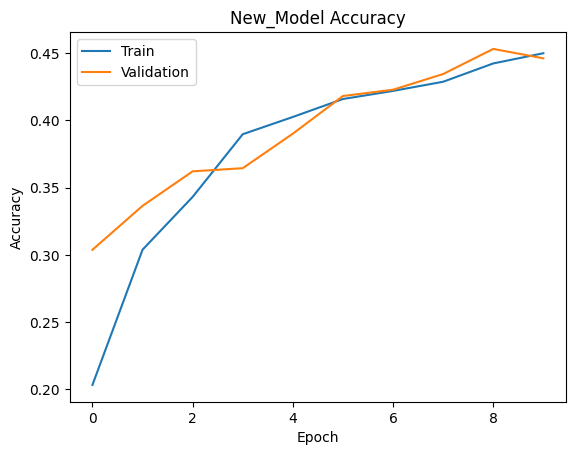

In [61]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('New_Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### this model is not overfitting but the accuracy is poor.

In [62]:
#Here we would get the output as probabilities for each category
y_pred_new_model = new_model.predict(X_test_normalized)

15/15 [==============================] - 1s 33ms/step


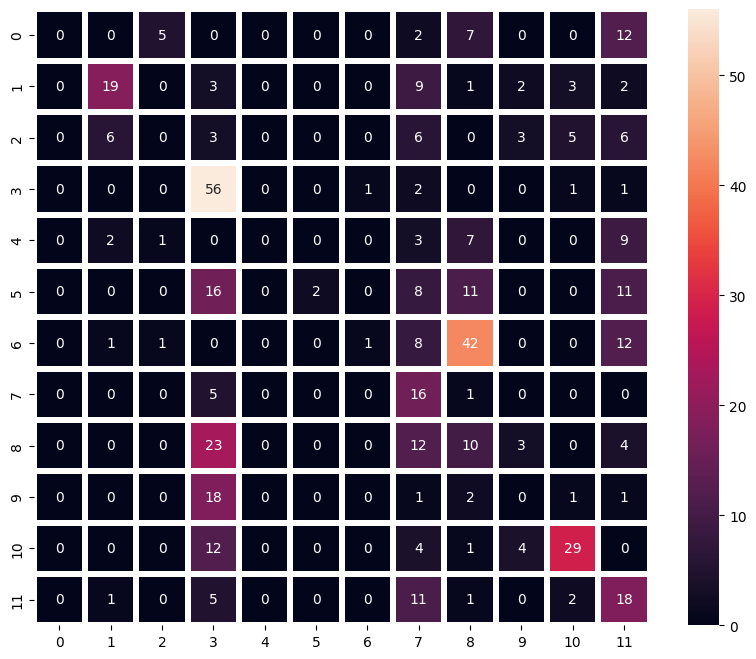

In [64]:
#Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_nm = np.argmax(y_pred_new_model, axis = 1)
y_test_arg3_nm = np.argmax(y_test_encoded, axis = 1)

#Plotting the Confusion Matrix usin confusion matrix() function which is also predefined tensorflow module
confusion_matrix_nm = tf.math.confusion_matrix(y_test_arg3_nm, y_pred_arg_nm)
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(
    confusion_matrix3,
    annot = True,
    linewidth = 4,
    fmt = 'd',
    square = True,
    ax=ax
)
plt.show()

##### the models prediction is poor. other balance techniques should be considered including cross validation